<a href="https://colab.research.google.com/github/gayatri-2005/Machine-Learning-/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


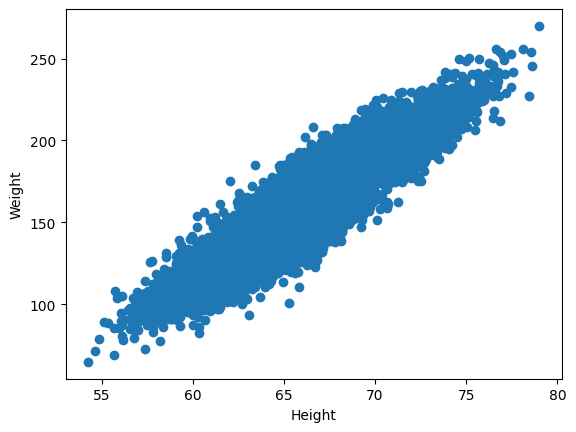

In [ ]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
df['Gender_numeric'] = df['Gender'].map({'Male': 0, 'Female': 1})
display(df.head())

,Gender,Height,Weight,Gender_numeric
0,Male,73.847017,241.893563,0
1,Male,68.781904,162.310473,0
2,Male,74.110105,212.740856,0
3,Male,71.730978,220.042470,0
4,Male,69.881796,206.349801,0


In [ ]:
print(df['Gender_numeric'].value_counts())

Gender_numeric
0    5000
1    5000
Name: count, dtype: int64


In [ ]:
df.corr(numeric_only=True)

,Height,Weight,Gender_numeric
Height,1.000000,0.924756,-0.691072
Weight,0.924756,1.000000,-0.796723
Gender_numeric,-0.691072,-0.796723,1.000000


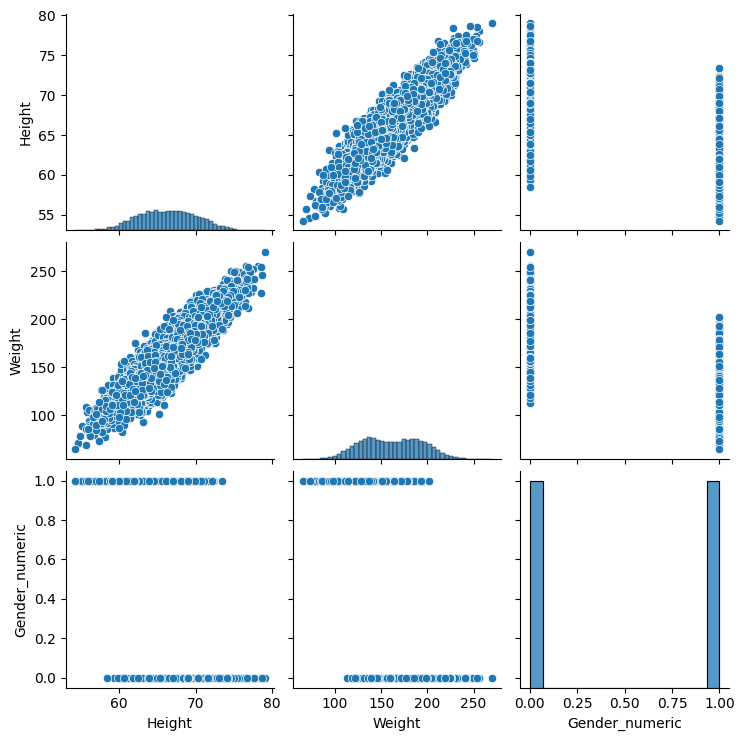

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
X= df[['Weight']] #independent features should be in 2d array or dataframe
y = df['Height']  # this variable can be in series or 1d array
np.array(X).shape

(10000, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
##Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.72087906],
       [-0.448392  ],
       [-0.06105029],
       ...,
       [ 0.65465354],
       [-0.96789814],
       [-1.01866384]])

In [ ]:
##Applying linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope :",regression.coef_)
print("Intercept :",regression.intercept_)

Coefficient or slope : [3.54211583]
Intercept : 66.42140377220834


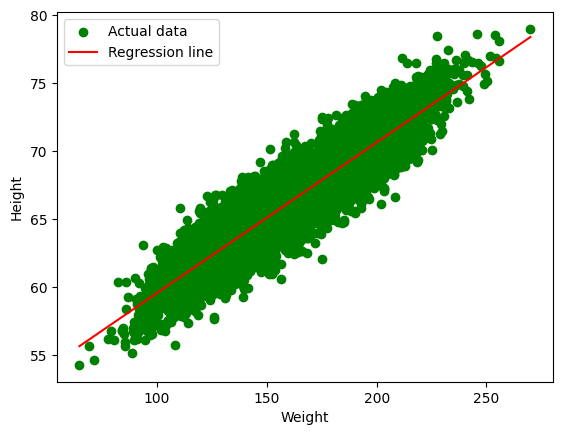

In [53]:
plt.scatter(X_train['Weight'], y_train, color='green', label='Actual data')

# Predict on training data
y_train_pred = regression.predict(X_train_scaled)

# Sort X_train and y_train_pred for plotting the regression line
sorted_indices = X_train['Weight'].argsort()

# Plot the regression line using sorted X_train and corresponding sorted y_train_pred
plt.plot(X_train['Weight'].iloc[sorted_indices], y_train_pred[sorted_indices], color='red', label='Regression line')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

predicted height output = intercept + coef_(Weights)

y_pred_test = 66.4 + 3.54(X_test)

In [36]:
y_pred = regression.predict(X_test_scaled)

In [38]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

In [54]:
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

MSE: 2.1414220927067484
MAE: 1.1649277894255878
RMSE : 1.4633598643897368


R Square

Formula
R^2 = 1-SSR/SST

R^2 = coefficient of determination
SSR = sum of squares ofo residuals
SST = total sum of squares

In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R2 Score:",score)

R2 Score: 0.8581839591039617


Adjusted R2 score = 1-[(1-R2)*(n-1)/(n-k-1)]

where

R2 - R2 score
n - number of observations
k - number of predicted variables


In [43]:
#Adjusted R2 score

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8581271872701363

In [44]:
 #OLS Linear Regression

 import statsmodels.api as sm


In [48]:
model = sm.OLS(y_train,X_train_scaled).fit()
prediction = model.predict(X_test_scaled)
print(prediction)

[-2.7202851   3.04119207  4.40952438 ...  1.58661642 -0.34198873
  3.93972736]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.32
Date:                Wed, 21 Jan 2026   Prob (F-statistic):                    3.96e-06
Time:                        09:30:00   Log-Likelihood:                         -42114.
No. Observations:                7500   AIC:                                  8.423e+04
Df Residuals:                    7499   BIC:                                  8.424e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
#prediction for new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.45248251])